In [1]:
from deepar import *

In [2]:
mx.random.seed(0)
np.random.seed(0)

In [3]:
input_filename = 'data/monthly_inflows.tsv'

# create input dataframe
idf = pd.read_csv(input_filename, sep="\t", decimal=",", thousands='.')

# create empty output dataframe
odf = pd.DataFrame()

# get all plant names
plants = idf['CENTRAL'].unique()

# flatten every plant data
for plant in plants:
    df = idf.loc[idf['CENTRAL'] == plant]
    df = df.iloc[:, 2: 50].to_numpy().flatten()
    # append flattened data to output dataframe
    odf[plant] = df

dates = pd.date_range(start='1/1960', periods=len(odf), freq='M').strftime('%Y-%m')
odf.insert(loc=0, column='dates', value=dates)

# save processed dataframe 
# output_filename = 'monthly_inflows.csv'
# odf.to_csv(data/output_filename, index=True)
odf

,dates,LOS_MORROS,MAITENES_AM,MAITENES,PUNTILLA,ALFALFAL,VOLCAN,QUELTEHUES,SAUZALITO,SAUZAL,...,CURILEUFU,BUREO,MUNILQUE_1,MUNILQUE_2,PALMAR,CORRENTOSO,EL_PINAR,DONA_HILDA,CIPRESILLOS,CHAPIQUINA
0,1960-01,3.2,0.8,14.9,15.0,42.6,12.2,46.0,9.6,61.6,...,0.2,0.8,0.2,0.2,1.4,0.8,11.4,0.2,7.3,0.8
1,1960-02,3.1,0.3,13.0,17.3,33.1,12.2,46.0,9.9,63.4,...,0.2,0.5,0.1,0.1,1.0,0.6,1.8,0.2,7.5,1.1
2,1960-03,3.0,0.0,14.3,17.2,31.2,12.7,47.8,9.4,60.4,...,0.2,0.5,0.1,0.1,1.0,0.6,4.3,0.2,7.1,1.5
3,1960-04,2.8,0.0,11.2,17.8,17.1,11.7,44.1,5.1,32.8,...,0.2,0.5,0.1,0.1,1.8,1.1,3.9,0.2,3.9,1.5
4,1960-05,2.9,0.0,15.0,16.1,12.4,10.4,39.0,3.7,23.8,...,0.2,0.6,0.1,0.1,3.1,1.9,11.4,0.2,2.8,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2018-08,0.4,0.0,10.0,11.7,6.1,7.0,29.0,4.2,2.4,...,0.2,2.2,0.6,0.6,3.5,2.2,11.4,0.2,3.4,0.6
704,2018-09,0.7,0.0,10.5,15.0,6.4,7.7,30.1,5.8,10.7,...,0.2,2.0,0.5,0.5,2.2,1.3,6.6,0.2,4.1,0.5
705,2018-10,0.8,0.0,11.2,16.8,7.0,8.9,36.2,7.4,15.0,...,0.2,1.5,0.4,0.4,1.8,1.3,7.7,0.2,6.4,0.5
706,2018-11,1.5,0.0,11.9,17.7,12.4,13.2,50.3,10.3,56.9,...,0.2,1.1,0.3,0.3,2.0,1.4,11.8,0.2,8.3,0.4


In [4]:
test_station = 'COLBUN'
columns = ['dates', test_station]
df1 = get_df(odf, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station, plot=False)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 58.53it/s]


,DeepAR,Seasonal naive
MSE,31.010294,35.334501
abs_error,226.299994,235.899994
abs_target_sum,715.300003,715.300003
abs_target_mean,11.921667,11.921667
seasonal_error,7.795808,7.795808
MASE,0.482968,0.507500
MAPE,0.314581,0.374648
sMAPE,0.319754,0.331596
OWA,NaN,NaN
MSIS,5.631186,20.299987


100%|██████████| 50/50 [00:02<00:00, 23.76it/s, epoch=10/10, avg_epoch_loss=5.72]


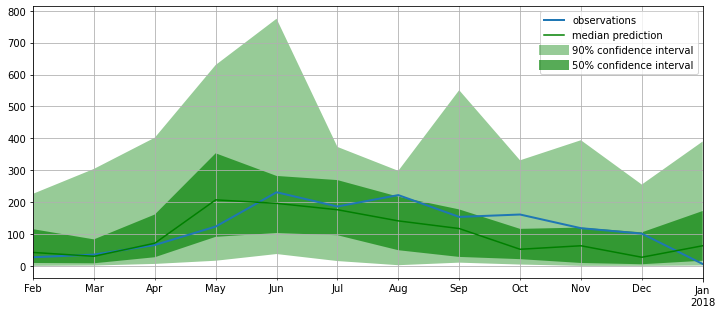

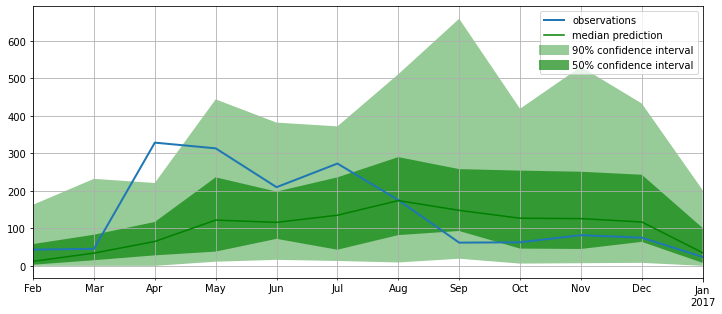

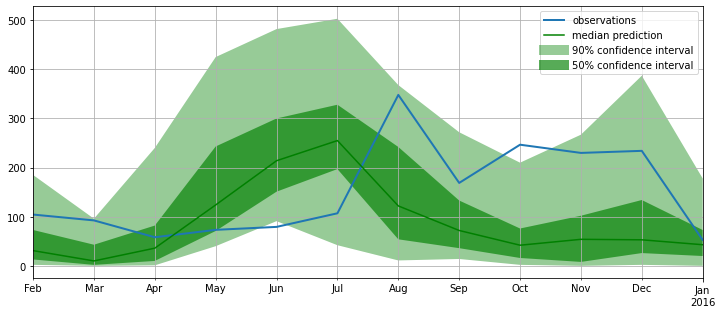

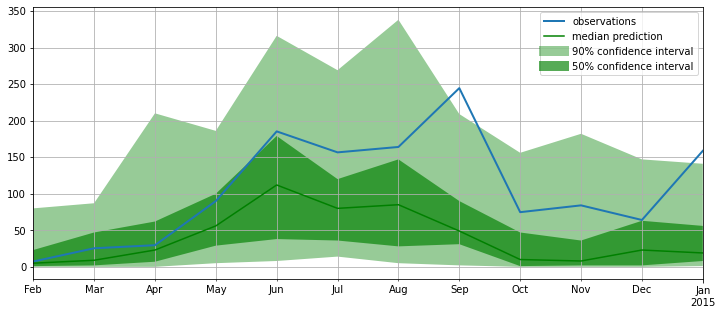

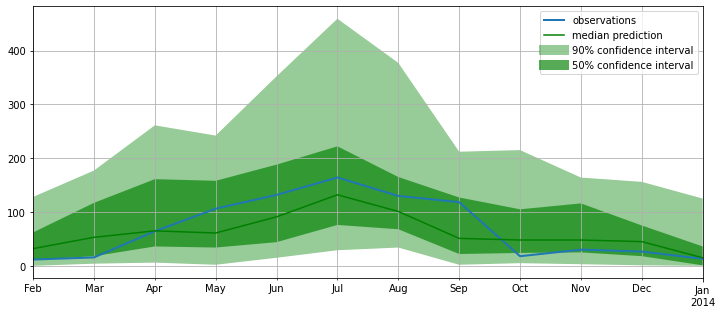

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 206.18it/s]


,DeepAR,Seasonal naive
MASE,0.627625,0.758353
MSIS,3.952632,30.334135
NSE,0.026092,-0.223704


In [5]:
test_station = 'RAPEL'
columns = ['dates', test_station]
df1 = get_df(odf, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station, plot=True)

In [6]:
test_station = 'ANGOSTURA'
columns = ['dates', test_station]
df1 = get_df(odf, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 157.95it/s]


,DeepAR,Seasonal naive
MASE,0.763265,0.751939
MSIS,7.621497,30.077560
NSE,0.121663,0.120460


In [7]:
test_station = 'RALCO'
columns = ['dates', test_station]
df1 = get_df(odf, columns, past_years=20)
model = fit(df1, columns)
predict(model, df1, test_station)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 152.11it/s]


,DeepAR,Seasonal naive
MASE,0.647482,0.742310
MSIS,8.245479,29.692388
NSE,0.290830,0.103241


In [5]:
df3 = odf.iloc[- 20 * 12:]
df3 = df3.set_index('dates')
df3 = df3.dropna(thresh=100, axis=1)
columns = df3.columns.values.tolist()

model = fit(df3, columns, epochs=10)

100%|██████████| 50/50 [00:04<00:00, 10.27it/s, epoch=10/10, avg_epoch_loss=2.57]


In [9]:
test_station = 'COLBUN'
predict(model, df3, test_station)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 180.59it/s]


,DeepAR,Seasonal naive
MASE,0.489782,0.507500
MSIS,7.129927,20.299987
NSE,0.370366,0.307515


In [10]:
test_station = 'RAPEL'
predict(model, df3, test_station, plot=False)


Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 186.26it/s]


,DeepAR,Seasonal naive
MASE,0.535534,0.758353
MSIS,4.504007,30.334135
NSE,0.138945,-0.223704


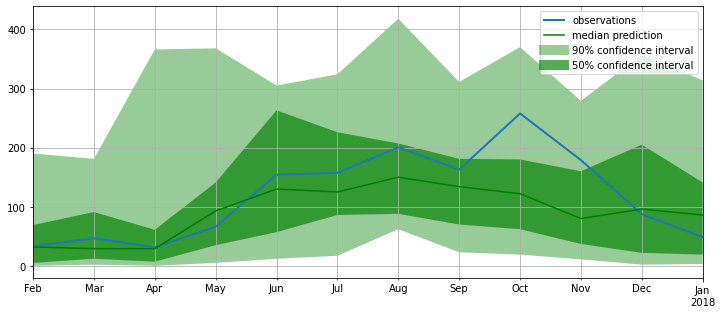

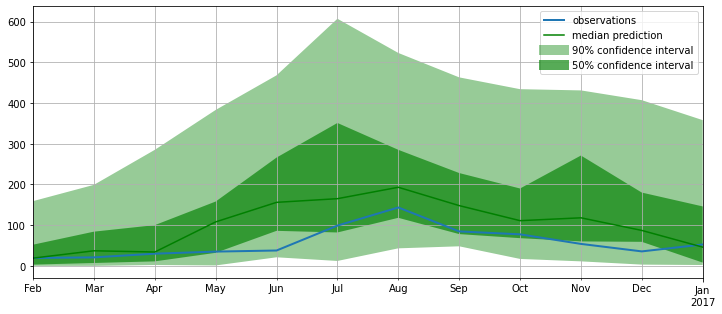

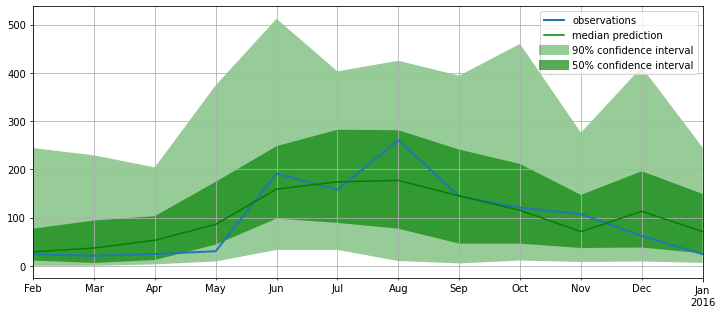

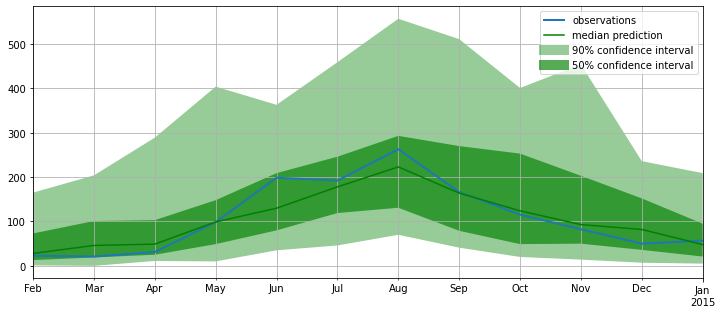

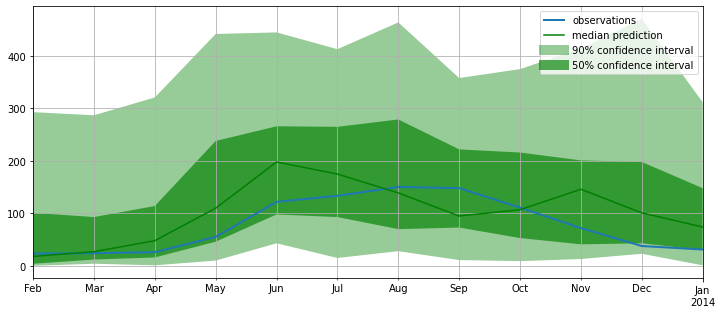

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 126.96it/s]


,DeepAR,Seasonal naive
MASE,0.662226,0.751939
MSIS,7.709980,30.077560
NSE,0.243165,0.120460


In [11]:
test_station = 'ANGOSTURA'
predict(model, df3, test_station, plot=True)

In [12]:
test_station = 'RALCO'
predict(model, df3, test_station)

Running evaluation: 100%|██████████| 5/5 [00:00<00:00, 95.97it/s]


,DeepAR,Seasonal naive
MASE,0.779881,0.742310
MSIS,8.175505,29.692388
NSE,0.182272,0.103241
